In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.simplefilter("ignore")
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Task 1**

In [2]:
#Read the dataset and print first 10 rows.
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [3]:
#find datatype of each column
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [4]:
#assign a variable for each feature
age = df['age']
anaemia = df['anaemia']
CPK = df['creatinine_phosphokinase']
diabetes = df['diabetes']
ejection_fraction = df['ejection_fraction']
HBP = df['high_blood_pressure']
platelets = df['platelets']
SC = df['serum_creatinine']
SS = df['serum_sodium']
sex = df['sex']
smoking = df['smoking']
time = df['time']
death = df['DEATH_EVENT']

In [5]:
#convert data type of each column as given in the description pdf of the dataset
convert_df = {'age': int,
              'anaemia': bool,
              'diabetes': bool,
              'ejection_fraction': float,
              'high_blood_pressure': bool,
              'sex': bytes,
              'smoking': bool,
              'DEATH_EVENT': bool
              }

df = df.astype(convert_df)
print(df.dtypes)

age                           int32
anaemia                        bool
creatinine_phosphokinase      int64
diabetes                       bool
ejection_fraction           float64
high_blood_pressure            bool
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                          object
smoking                        bool
time                          int64
DEATH_EVENT                    bool
dtype: object


# **Task 2.1**

In [6]:
#find the number of features and instances.
print(df.shape)

(299, 13)


In [7]:
#Round the age in 'age' column, 
age.round(decimals=0)
print(df.isnull().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [8]:
# use .info() to see if there are any errors in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int32  
 1   anaemia                   299 non-null    bool   
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    bool   
 4   ejection_fraction         299 non-null    float64
 5   high_blood_pressure       299 non-null    bool   
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    object 
 10  smoking                   299 non-null    bool   
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    bool   
dtypes: bool(5), float64(3), int32(1), int64(3), object(1)
memory usag

In [9]:
#use describe() method to find all the statistical information. 
df.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.829431,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894997,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


In [10]:
#Check if each bool and binary column has only 2 values.
df.sex.unique()

array([b'1', b'0'], dtype=object)

In [11]:
#Check if each bool and binary column has only 2 values.
df.smoking.unique()

array([False,  True])

In [12]:
#Check if each bool and binary column has only 2 values.
df.high_blood_pressure.unique()

array([ True, False])

In [13]:
#Check if each bool and binary column has only 2 values.
df.DEATH_EVENT.unique()

array([ True, False])

In [14]:
#Check if each bool and binary column has only 2 values.
df.anaemia.unique()

array([False,  True])

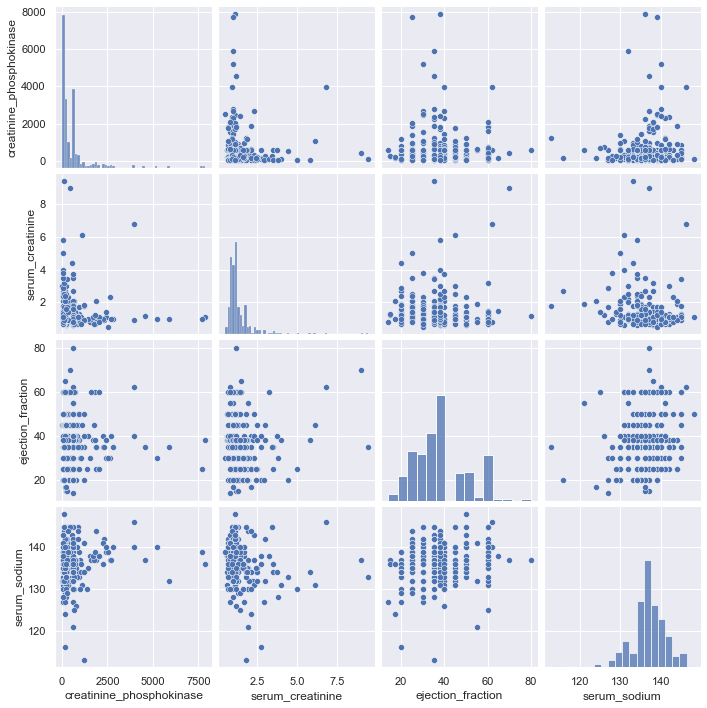

In [15]:
sns.set()
cols = ['creatinine_phosphokinase', 'serum_creatinine', 'ejection_fraction', 'serum_sodium']
sns.pairplot(df[cols], size = 2.5)
plt.show();

In [16]:
df['sex'].value_counts()

b'1'    194
b'0'    105
Name: sex, dtype: int64

In [17]:
df['smoking'].value_counts()

False    203
True      96
Name: smoking, dtype: int64

In [18]:
df['high_blood_pressure'].value_counts()

False    194
True     105
Name: high_blood_pressure, dtype: int64

# **Task 2.2**

[Text(0.5, 0, 'Age'), Text(0, 0.5, 'CPK'), Text(0.5, 1.0, 'age against CPK')]

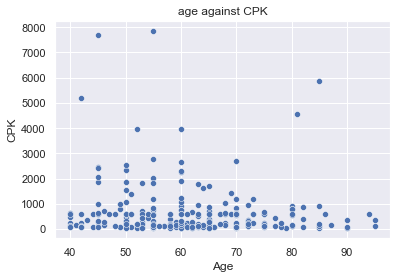

In [19]:
sns.scatterplot(age, CPK).set(xlabel='Age', ylabel='CPK', title='age against CPK')

[Text(0.5, 0, 'Age'), Text(0, 0.5, 'CPK'), Text(0.5, 1.0, 'age against CPK')]

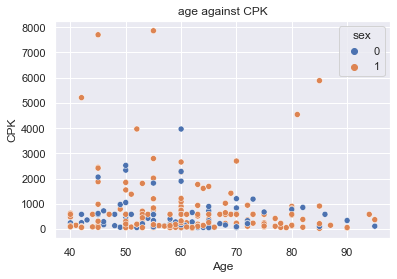

In [20]:
sns.scatterplot(age, CPK, sex).set(xlabel='Age', ylabel='CPK', title='age against CPK')

[Text(0.5, 0, 'Age'), Text(0, 0.5, 'SC'), Text(0.5, 1.0, 'age against SC')]

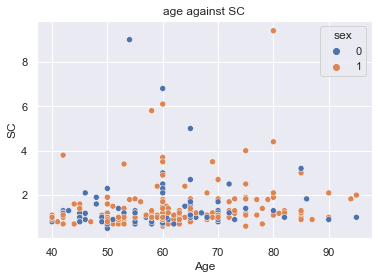

In [21]:
sns.scatterplot(age, SC, sex).set(xlabel='Age', ylabel='SC', title='age against SC')

[Text(0.5, 0, 'diabetes'),
 Text(0, 0.5, 'SC'),
 Text(0.5, 1.0, 'diabetes against SC')]

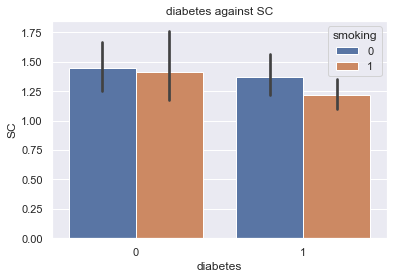

In [22]:
sns.barplot(diabetes, SC, smoking).set(xlabel='diabetes', ylabel='SC', title='diabetes against SC')

[Text(0.5, 0, 'diabetes'),
 Text(0, 0.5, 'CPK'),
 Text(0.5, 1.0, 'diabetes against CPK')]

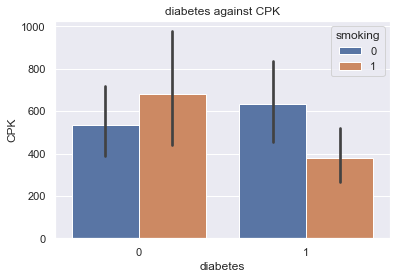

In [23]:
sns.barplot(diabetes, CPK, smoking).set(xlabel='diabetes', ylabel='CPK', title='diabetes against CPK')

[Text(0.5, 0, 'HBP'),
 Text(0, 0.5, 'ejection fraction'),
 Text(0.5, 1.0, 'HBP against EF')]

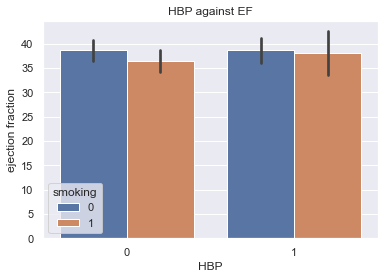

In [24]:
sns.barplot(HBP, ejection_fraction, hue = smoking).set(xlabel='HBP', ylabel='ejection fraction', title='HBP against EF')

[Text(0.5, 0, 'smoking'),
 Text(0, 0.5, 'platelets'),
 Text(0.5, 1.0, 'smoking against platelets')]

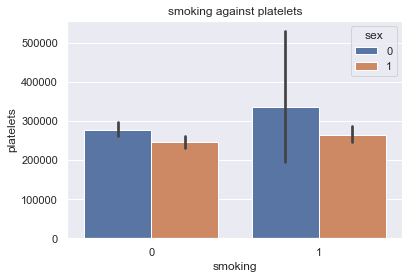

In [25]:
sns.barplot(smoking, platelets, sex).set(xlabel='smoking', ylabel='platelets', title='smoking against platelets')

[Text(0.5, 0, 'death'),
 Text(0, 0.5, 'ejection fraction'),
 Text(0.5, 1.0, 'death against ejection fraction')]

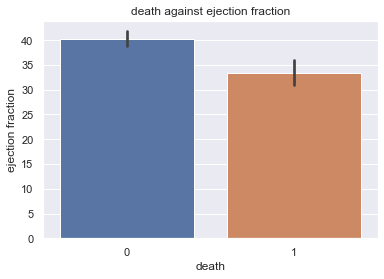

In [26]:
sns.barplot(death, ejection_fraction).set(xlabel='death', ylabel='ejection fraction', title='death against ejection fraction')

[Text(0.5, 0, 'death'),
 Text(0, 0.5, 'serum creatinine'),
 Text(0.5, 1.0, 'death against serum creatinine')]

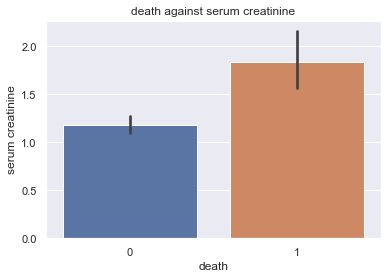

In [27]:
sns.barplot(death, SC).set(xlabel='death', ylabel='serum creatinine', title='death against serum creatinine')

[Text(0.5, 0, 'SC'), Text(0, 0.5, 'EF'), Text(0.5, 1.0, 'SC against EF')]

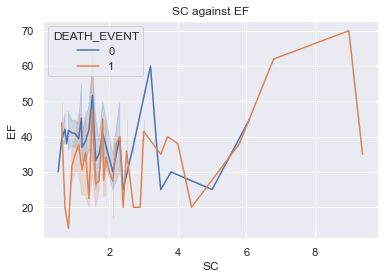

In [28]:
sns.lineplot(SC, ejection_fraction, death).set(xlabel='SC', ylabel='EF', title='SC against EF')

[Text(0.5, 0, 'time'), Text(0, 0.5, 'SS'), Text(0.5, 1.0, 'time against SS')]

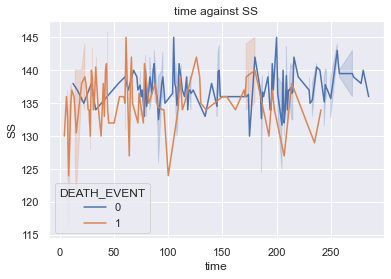

In [29]:
sns.lineplot(time, SS, death).set(xlabel='time', ylabel='SS', title='time against SS')

# **Task 3**

## **Decision tree classifier**

In [30]:
#Task3
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,0:-1], df['DEATH_EVENT'], test_size = 0.2, random_state = 42)

In [31]:
#Decision Tree accuracy
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier()
dt1.fit(x_train, y_train)
dt1.fit(x_train, y_train)
y_prediction1 = dt1.predict(x_test)
y_prediction1
print('Model accuracy score with default parameters: {0:0.2f}%'. format(accuracy_score(y_test, y_prediction1)*100))

Model accuracy score with default parameters: 61.67%


In [32]:
#Decision tree accuracy for max depth of 6
dt2 = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)
dt2.fit(x_train, y_train)
y_prediction2 = dt2.predict(x_test)
y_prediction2  
print('Model accuracy score with entropy and max depth 6 : {0:0.2f}%'. format(accuracy_score(y_test, y_prediction2)*100))

Model accuracy score with entropy and max depth 6 : 70.00%


In [33]:
#Decision tree accuracy for max depth of 3
dt3 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dt3.fit(x_train, y_train)
y_prediction3= dt3.predict(x_test)
y_prediction3  
print('Model accuracy score with entropy and max depth 3 : {0:0.4f}%'. format(accuracy_score(y_test, y_prediction3)*100))

Model accuracy score with entropy and max depth 3 : 73.3333%


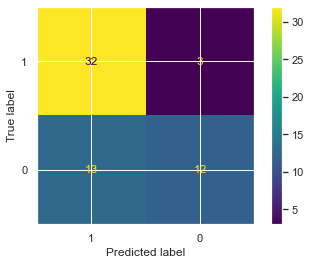

In [34]:
#for dt3(decision tree 3)
cm = confusion_matrix(y_test, y_prediction3)
cmd = ConfusionMatrixDisplay(cm, display_labels=['1','0'])
print(cmd.plot())

## **K Nearest Neighbour  classifier**

[0.5333333333333333, 0.5666666666666667, 0.5333333333333333, 0.55, 0.5333333333333333, 0.5333333333333333, 0.5333333333333333, 0.55, 0.55]


Text(0, 0.5, 'Accuracy of Testing')

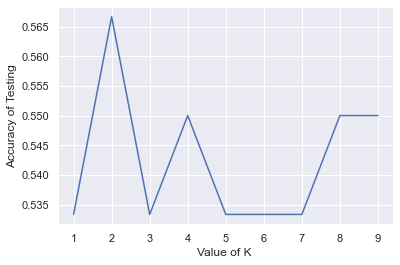

In [35]:

range = range(1, 10)
score = []
for k in range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    score.append(accuracy_score(y_test, y_pred))
print(score)

plt.plot(range, score)
plt.xlabel('Value of K ')
plt.ylabel('Accuracy of Testing')

In [36]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
score = accuracy_score(y_test, y_pred_knn)
score

0.5666666666666667

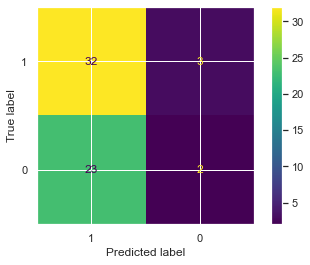

In [37]:
cm = confusion_matrix(y_test, y_pred_knn)
cmd = ConfusionMatrixDisplay(cm, display_labels=['1','0'])
print(cmd.plot())

In [38]:
acc_score = accuracy_score(y_test, y_pred_knn)*100
print('accuracy of model on the test dataset is : ', acc_score ) 

accuracy of model on the test dataset is :  56.666666666666664
